To analyze how various material components affect the compressive strength of concrete.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb


In [5]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 🔍 Dataset Overview

Each row represents a concrete sample with measurements of:

### • Input Features:
- **Cement**
- **Blast Furnace Slag**
- **Fly Ash**
- **Water**
- **Superplasticizer**
- **Coarse Aggregate**
- **Fine Aggregate**
- **Age** (in days)

### • Target:
- **Strength** (compressive strength in MPa)



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Plot histograms for all features
df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

# Plot boxplots to detect outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Scatter plots: Cement vs Strength and Age vs Strength
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Cement', y='Strength', data=df)
plt.title('Cement vs Strength')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Strength', data=df)
plt.title('Age vs Strength')

plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA)

To understand the underlying structure and relationships within the dataset, an Exploratory Data Analysis (EDA) was performed on all input variables and the target variable, compressive strength. The dataset comprises 1,030 observations and 9 variables, including the compressive strength of concrete and various mix design components such as cement, water, aggregates, and additives.

### Correlation Analysis

A correlation heatmap was generated to assess the linear relationships between variables. The results indicate that **Cement** (r = 0.50), **Age** (r = 0.33), and **Superplasticizer** (r = 0.36) have positive correlations with compressive strength. Conversely, **Water** (r = -0.29) demonstrates a negative relationship with strength, which aligns with civil engineering knowledge that excess water can weaken concrete.

### Distribution of Variables

Histograms were plotted for all features. Most input features, such as cement, fly ash, and aggregates, exhibit a right-skewed distribution. The **Age** variable is highly skewed, with a significant number of samples aged less than 30 days. Additionally, features like **Fly Ash** and **Blast Furnace Slag** show a large proportion of zero values, indicating that not all samples contained these materials.

### Outlier Detection

Boxplots were used to identify potential outliers. Outliers were observed in **Superplasticizer**, **Age**, and **Strength**. While these may represent valid data (e.g., older concrete samples or mixes with high plasticizer dosage), they may affect model performance and require attention during preprocessing.

### Scatter Plot Analysis

Scatter plots were generated to examine bivariate relationships. The plot of **Cement vs Strength** showed a clear positive trend, reinforcing cement’s role as a primary contributor to compressive strength. The **Age vs Strength** plot indicated that strength generally increases with curing time, although the increase plateaus at higher ages.

These analyses suggest that several input variables strongly influence concrete strength, and their relationships are likely nonlinear. This insight will guide the selection of appropriate modeling techniques in subsequent stages of this study.


In [ ]:
# Check for missing values
print(df.isnull().sum())


Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


In [7]:
# Normalize/scale features (excluding the target column 'Strength')
features = df.drop(columns='Strength')
target = df['Strength']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42)
}


In [13]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
results_df


,Model,RMSE,MAE,R2 Score
0,Linear Regression,9.796476,7.745559,0.627553
1,Random Forest,5.471945,3.738485,0.883799
2,Gradient Boosting,5.493350,4.135014,0.882889
3,XGBoost,4.606305,2.996375,0.917656


Four regression models were trained and evaluated to predict the compressive strength of concrete. Among them, XGBoost delivered the best performance with the lowest RMSE (4.61) and MAE (2.99), along with the highest R² score (0.918), indicating strong predictive accuracy and minimal error.

The Random Forest and Gradient Boosting models also performed well, both achieving an R² around 0.88, with RMSE values close to 5.5. In contrast, Linear Regression showed relatively weaker performance, with an RMSE of 9.80 and an R² of 0.63, suggesting it failed to capture the complex nonlinear relationships in the data.

These results demonstrate that ensemble tree-based models, particularly XGBoost, are well-suited for this regression task.

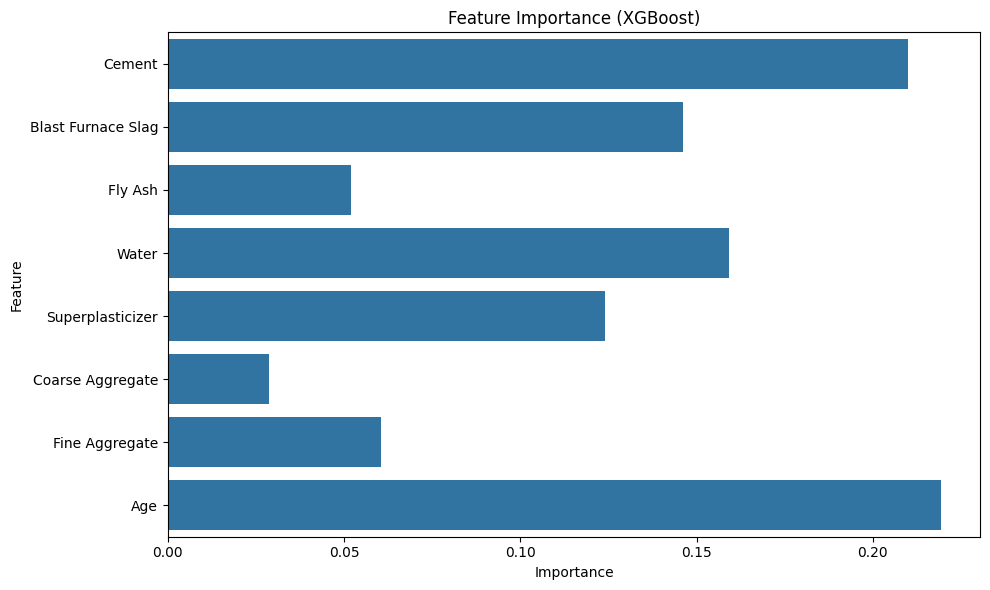

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use feature names from the original dataset
feature_names = X.columns 

# Feature importance from XGBoost
xgb_model = models["XGBoost"]
importances = xgb_model.feature_importances_

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


🔍 Feature Importance Analysis (XGBoost)
The feature importance plot highlights the relative contribution of each input feature to the model’s prediction of concrete compressive strength. According to the results:

Age and Cement are the most influential features, each contributing significantly to model performance. This is expected, as the curing time (Age) and the amount of cement directly affect concrete strength.

Water, Blast Furnace Slag, and Superplasticizer also show strong importance, indicating their key roles in enhancing or modifying the mix’s performance.

Fly Ash, Fine Aggregate, and especially Coarse Aggregate exhibit lower importance, suggesting a lesser direct impact on the predicted strength in this dataset.

These insights can help in optimizing concrete mix design by focusing on the most impactful materials and curing factors.

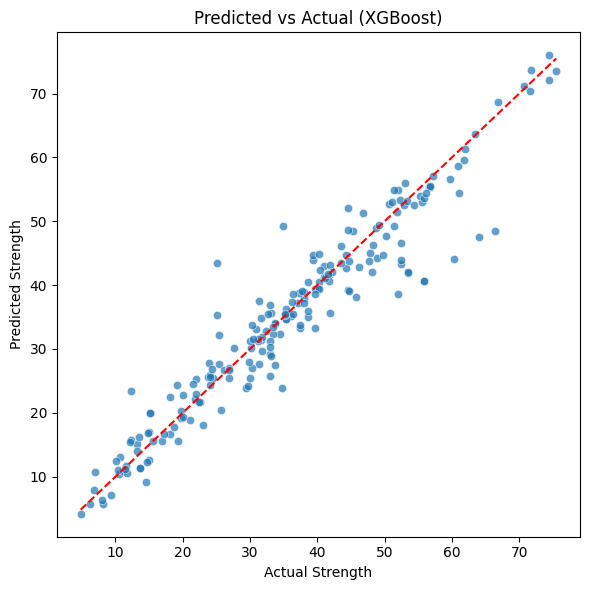

In [15]:
# Predictions from the best model
y_pred = xgb_model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Predicted vs Actual (XGBoost)')
plt.tight_layout()
plt.show()


📈 Predicted vs Actual Strength (XGBoost)
The scatter plot above compares the predicted compressive strength values against the actual observed values for the test data. Ideally, if the predictions were perfect, all points would lie exactly on the red dashed line, which represents the line Predicted = Actual.

In this case:

The points are tightly clustered around the diagonal, indicating that the XGBoost model is accurately capturing the relationship between the input features and compressive strength.

Minor deviations from the line suggest some residual error, but the distribution appears unbiased, with no clear overfitting or underfitting pattern.

The overall alignment supports the strong R² score (~0.92) achieved during model evaluation, confirming the model’s high predictive performance.



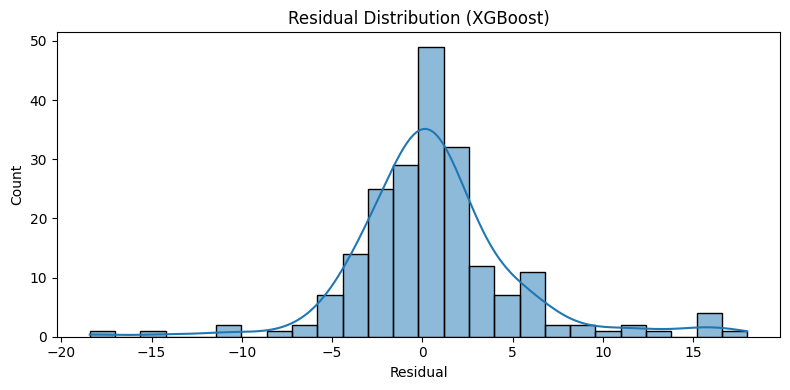

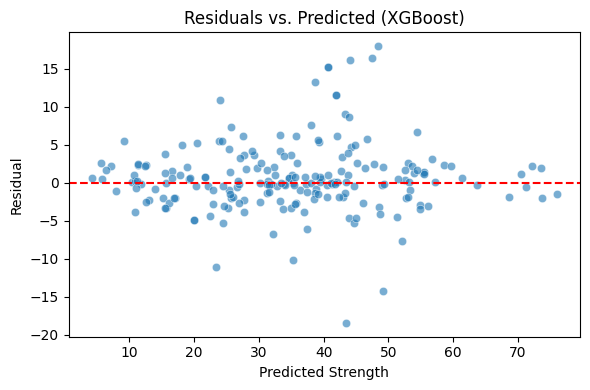

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution (XGBoost)')
plt.xlabel('Residual')
plt.tight_layout()
plt.show()

# Optional: Residuals vs. Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Strength')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted (XGBoost)')
plt.tight_layout()
plt.show()


🧮 Residual Analysis (XGBoost)
The histogram displays the distribution of residuals, which are the differences between actual and predicted compressive strength values. Ideally, residuals should be centered around zero and roughly normally distributed, indicating that the model does not systematically over- or under-predict.

In this case:

The residuals are tightly centered around zero, with a bell-shaped distribution, suggesting that the model’s predictions are unbiased.

There is a slight spread on both sides, but no significant skewness or extreme outliers, reinforcing the consistency of the model’s performance.

The shape confirms that most prediction errors are small, further validating the model’s accuracy as reflected in the low RMSE and MAE.

This distribution supports the reliability of the XGBoost model for predicting concrete strength.

